In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Numerical Integration Methods - Monte Carlo Estimation

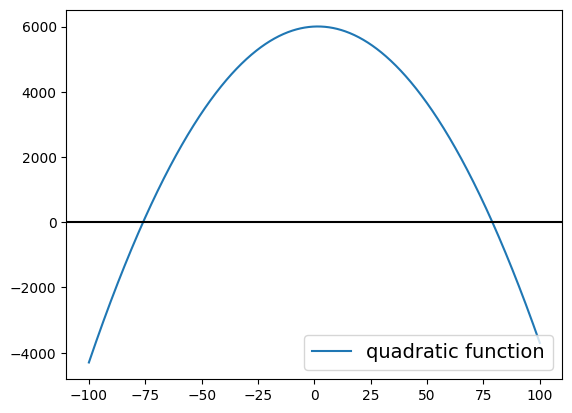

In [20]:
#Plot quadratic function
def quadratic_equation(x):
    return -x**2+3*x+6000

def quadratic_function(start,stop, N, quadratic_equation):
    domain = np.linspace(start,stop, N)
    range = [quadratic_equation(x) for x in domain]
    return domain, range

domain, range = quadratic_function(-100, 100,1000, quadratic_equation)

fig,ax = plt.subplots()
ax.plot(domain,range,label='quadratic function')
ax.legend(loc='lower right', fontsize=14)
plt.axhline(y=0,color='black')
plt.show()

In [32]:
def monte_carlo(f, a, b, N):
    domain_points = np.random.uniform(a,b,N) #input
    range_points = [f(input) for input in domain_points] #output points
    return (sum(range_points)/len(range_points))*(b-a)

print(monte_carlo(np.sin,0,2*np.pi, 5000))

# Integral of quadratic_equation
N = 9000000
quadrature_estimation = spi.quad(quadratic_equation,-100,100)[0]
monte_carlo_estimation = monte_carlo(quadratic_equation,-100,100,N)
error = quadrature_estimation - monte_carlo_estimation
# Error should be roughly proportional to q in N^q = error
q = float(np.log(error)/np.log(N))
print(f"Quadrature numerical integration estimation: {quadrature_estimation} \nMonte Carlo estimation: { monte_carlo_estimation} \nDifference between quadrature and MC: {error}")
print(f"{q=}")
print(f"{N**q=} is the estimation of the error, the error is: {error}")

-0.09877014603400681
Quadrature numerical integration estimation: 533333.3333333333 
Monte Carlo estimation: 533118.2321287985 
Difference between quadrature and MC: 215.10120453475975
q=0.33542730774956203
N**q=215.1012045347598 is the estimation of the error, the error is: 215.10120453475975


In [45]:
# Equation with 2 independent variables
def surface_equation(x,y):
    return x**3 + 5*y**3

def monte_carlo_2d(f,a,b,c,d, N):
    x_domain_points = np.random.uniform(a,b,N) #input
    y_domain_points = np.random.uniform(c,d,N) #input
    range_points = [f(x,y) for x,y in zip(x_domain_points,y_domain_points)] #output points
    return (sum(range_points)/len(range_points))*(b-a)*(d-c)

N = 90000000
monte_carlo_2d_estimation = float(monte_carlo_2d(surface_equation,10,100,10,100,N))
quadrature_estimation= spi.dblquad(surface_equation, 10, 100, lambda x: 10, lambda x: 100, epsabs=1e-8, epsrel=1e-8  # Tighter error tolerances
                                   )[0]

error = monte_carlo_2d_estimation - quadrature_estimation
print(f"{monte_carlo_2d_estimation=}")
print(f"{quadrature_estimation=}")
print(f"{error=}")

monte_carlo_2d_estimation=13499492489.420485
quadrature_estimation=13498650000.0
error=842489.4204845428
